# Setup

In [ ]:
import itertools

import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
plot_params = {'legend.fontsize': 20,
               'figure.figsize': (20, 10),
               'axes.labelsize':  15,
               'axes.titlesize':  30,
               'xtick.labelsize': 15,
               'ytick.labelsize': 15,
               'figure.dpi': 300}

plt.style.use('seaborn-v0_8')

#plt.rcParams.update(plot_params)

color_dark_blue = [1/255, 62/255, 125/255]
color_light_blue = [6/255, 143/255, 203/255]
purple = [102/255, 51/255, 153/255]

colors = [color_dark_blue, color_light_blue, purple]

color_line = list(itertools.product(['-', ':', '--', ':' '-', ':'], colors))

# Load Data

Data from:

https://www.kaggle.com/code/calven22/forecasting-inflation-with-arima-and-lstm/input

In [ ]:
df = pd.read_csv('macro_monthly.csv', index_col=0).dropna()
df.index = pd.DatetimeIndex(df.index).to_period('M')

In [ ]:
df.columns

Index(['unrate', 'psr', 'm2', 'dspic', 'pce', 'reer', 'ir', 'ffer', 'tcs',
       'indpro', 'ccpi'],
      dtype='object')

In [ ]:
df.columns = ['Unemployment Rate',
'Personal Saving Rate',
'M2','Disposable Income',
 'Personal Consumption Expenditure',
 'Real Effective Exchange Rate',
 '10Y Treasury Yield',
 'Fed Rate',
 'Construction Spending',
 'Industrial Production Index',
 'Core CPI']

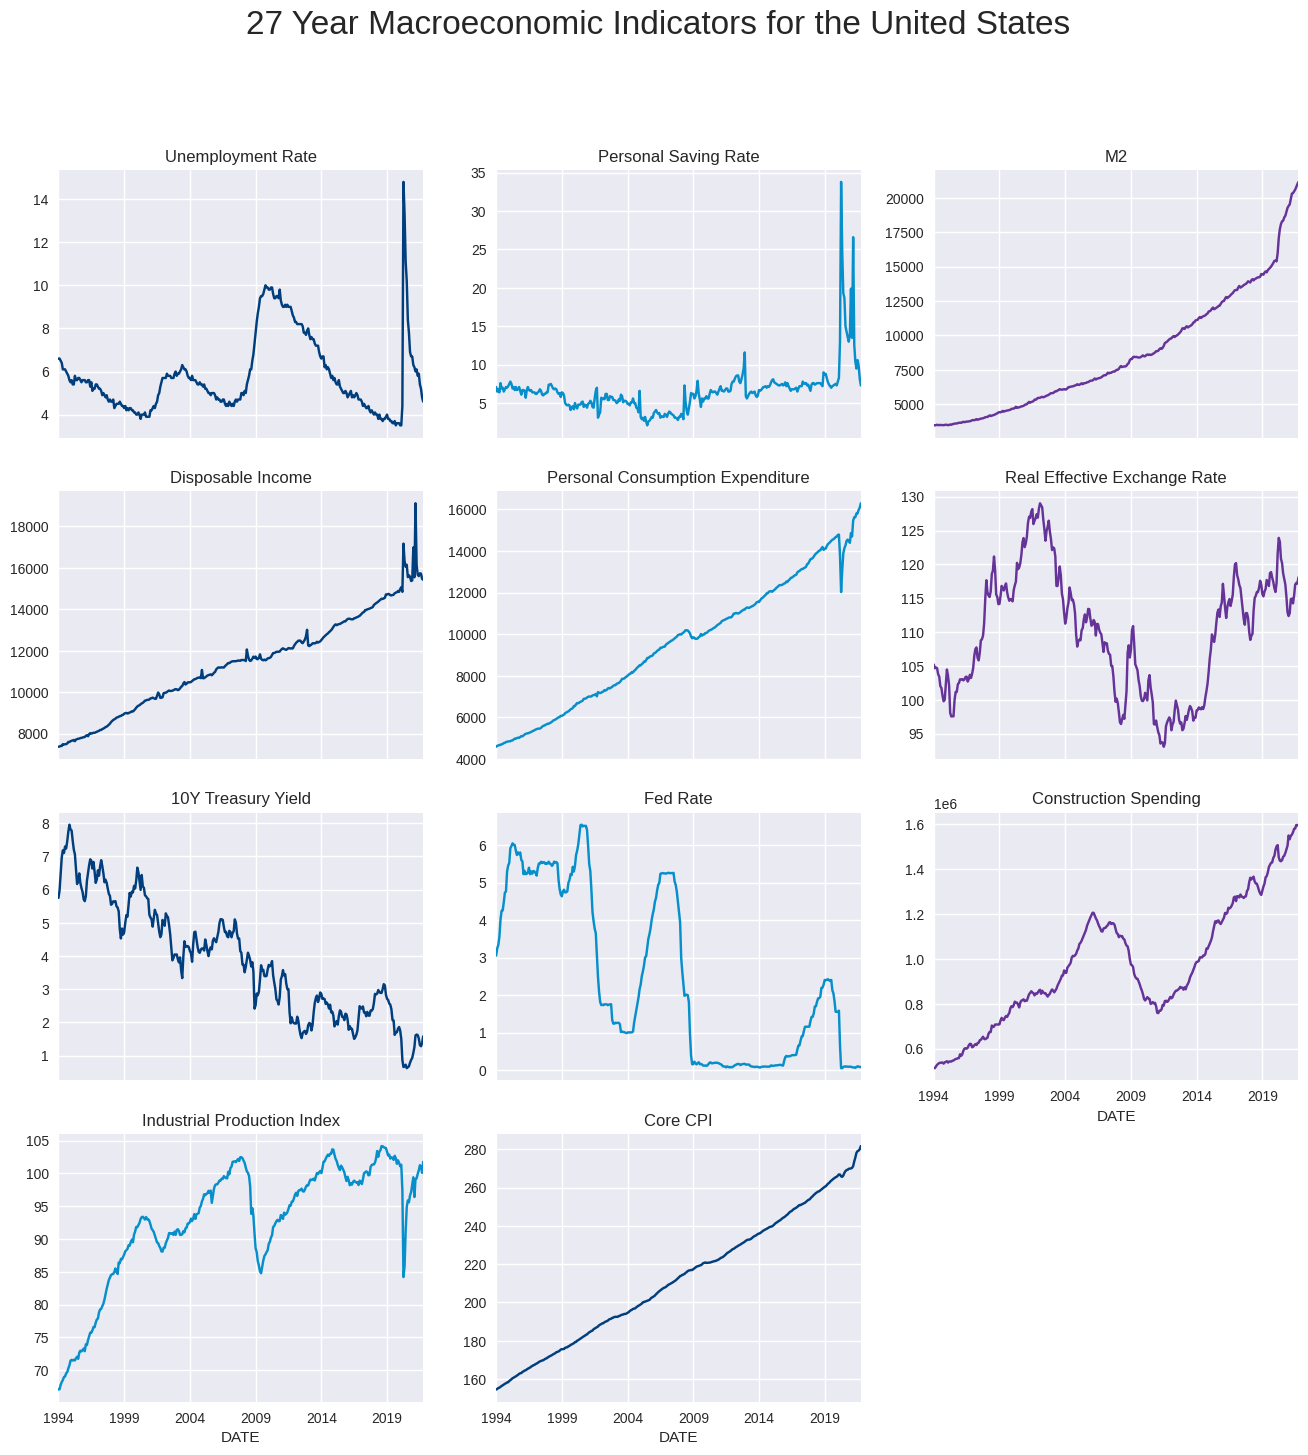

In [ ]:
df.plot(subplots = True,
        figsize = (16,16),
        legend = False,
        title = list(df.columns),
        layout = (4,3),
        sharex = True,
        color = colors * 3 + [color_light_blue])

plt.suptitle('27 Year Macroeconomic Indicators for the United States', fontsize = 24);

## Question 1

Choose three time series to perform the VAR analysis. What are the "research" questions you hope to answer?

In [ ]:
columns = []

In [ ]:
df = df[columns].dropna()

In [ ]:
n = len(df)
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n*0.9)]
test_df = df[int(n*0.9):]

# Augmented Dickey–Fuller Stationarity Test

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
# ADF Test on each column
for name, column in train_df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

## Question 1

How can we make this time series stationary? Is the transformed series really stationary?

In [ ]:
train_df_stationary =

## Question 2

What should be the lag of VAR for this data? Estimate the VAR in this case.

## Question 3

Compute the IRF under the estimated VAR model and discuss the results.



## Question 4

Foresct the time series for the next day in the validation set and discuss the results.